#Importing libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
Gold_dataset=pd.read_csv("/content/drive/MyDrive/gld_price_data.csv")

In [3]:
Gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [35]:
Gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
Gold_dataset.shape

(2290, 6)

In [5]:
Gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
Gold_dataset.isnull().sum().sum()

0

##Correlation:
####1.Positive correlation: 1 increases other also
####2.Negative correlation: 1 increases other decreases

In [8]:
correlation=Gold_dataset.corr()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

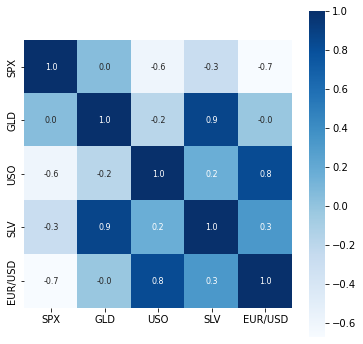

In [10]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
#more darker the color more good relation is ,, the correlation

In [11]:
print(correlation['GLD'])#correlation with Gold

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


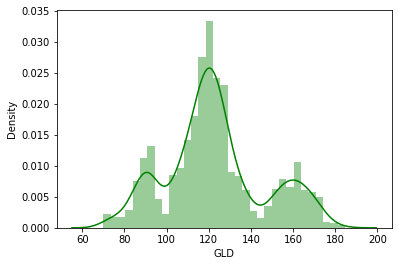

In [12]:
sns.distplot(Gold_dataset['GLD'], color='g') # see how price increases /decrease throughout

In [13]:
#Splitting Data
X=Gold_dataset.drop(columns =['Date','GLD'])
y=Gold_dataset['GLD']

In [14]:
print(X.shape, y.shape)

(2290, 4) (2290,)


##Train_test_split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train , X_test, y_train , y_test=train_test_split(X, y , test_size=0.1, random_state=51)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(2061, 4) (229, 4) (2061,) (229,)


###Training Model --->  Random_forest_regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
Random_forest_Regressor=RandomForestRegressor()

In [21]:
Random_forest_Regressor.fit(X_train , y_train)

RandomForestRegressor()

In [22]:
Random_forest_Regressor.score(X_test, y_test)

0.9863299585926366

RMSE

In [23]:
from sklearn.metrics import mean_squared_error

In [26]:
X_test_pred=Random_forest_Regressor.predict(X_test)
mse=mean_squared_error(X_test_pred, y_test)
rmse=np.sqrt(mse)

print("Root Mean Sqaure Error", rmse) # means 2.68 percent chance of getting wronge prediction 
# diff is only 2 

Root Mean Sqaure Error 2.6823502768112237


##Predictive system

In [29]:
input_data=(1390.189941,76.059998,15.590,1.557099)
prediction=Random_forest_Regressor.predict([input_data])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [30]:
print('Gold Price is --> ',prediction)# almost same as in dataset

Gold Price is -->  [86.64939889]


Saving and Loading model for prediction

In [31]:
import pickle 


In [32]:
pickle.dump(Random_forest_Regressor, open('Gold_Price_Random_forest', 'wb'))


In [33]:
Model=pickle.load(open('Gold_Price_Random_forest', 'rb'))

In [37]:
input_data=(2723.070068,14.4100,15.7400,1.191753)
pred=Model.predict([input_data])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [38]:
#prediction should be 125.180000 as per dataset 3rd last column
print("Gold Price Would be --> ", pred)

Gold Price Would be -->  [124.0978757]


END
